In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np

def wavelength_to_rgb(wavelength, gamma=0.8):
    """
    Convert a wavelength (nm) to an approximate RGB color.
    Valid range: 380 nm – 780 nm (visible spectrum).
    Returns: (R, G, B) tuple with values in [0, 1]
    Based on Dan Bruton's algorithm: http://www.physics.sfasu.edu/astro/color/spectra.html
    """
    wavelength = float(wavelength)
    if 380 <= wavelength <= 440:
        R = -1.0 * (wavelength - 440) / (440 - 380)
        G = 0.0
        B = 1.0
    elif 440 < wavelength <= 490:
        R = 0.0
        G = (wavelength - 440) / (490 - 440)
        B = 1.0
    elif 490 < wavelength <= 510:
        R = 0.0
        G = 1.0
        B = -1.0 * (wavelength - 510) / (510 - 490)
    elif 510 < wavelength <= 580:
        R = (wavelength - 510) / (580 - 510)
        G = 1.0
        B = 0.0
    elif 580 < wavelength <= 645:
        R = 1.0
        G = -1.0 * (wavelength - 645) / (645 - 580)
        B = 0.0
    elif 645 < wavelength <= 780:
        R = 1.0
        G = 0.0
        B = 0.0
    else:
        R = G = B = 0.0  # Outside visible range

    # Intensity correction (dim edges of visible spectrum)
    if 380 <= wavelength <= 420:
        factor = 0.3 + 0.7 * (wavelength - 380) / (420 - 380)
    elif 420 < wavelength <= 700:
        factor = 1.0
    elif 700 < wavelength <= 780:
        factor = 0.3 + 0.7 * (780 - wavelength) / (780 - 700)
    else:
        factor = 0.0

    R = (R * factor) ** gamma
    G = (G * factor) ** gamma
    B = (B * factor) ** gamma

    return (R, G, B)

array([404.7, 491.6, 546.1, 577. , 579.1])

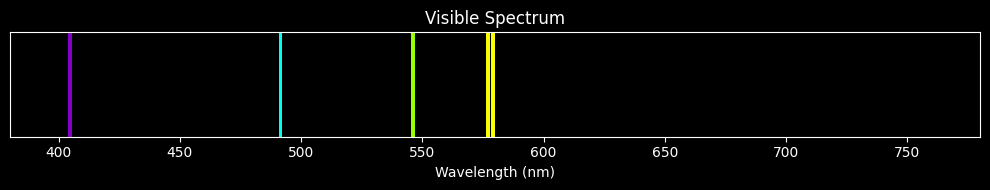

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Generate wavelengths across visible spectrum
wavelengths = np.array(pd.read_excel("data.xlsx",sheet_name=2).lb)
colors = [wavelength_to_rgb(w) for w in wavelengths]
plt.style.use('dark_background')
# Create a figure with colored bars
fig, ax = plt.subplots(figsize=(10, 2))
for i, (w, color) in enumerate(zip(wavelengths, colors)):
    ax.bar(w, 1, width=1.5, color=color, edgecolor='none')

ax.set_xlim(380, 780)
ax.set_ylim(0, 1)
ax.set_xlabel('Wavelength (nm)')
ax.set_title('Visible Spectrum')
ax.set_yticks([])
plt.tight_layout()
plt.show()